## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("BA_Clean_DataSet.csv")

## Droping Columns

In [3]:
df.head()

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score,Approval_Status,Review,Review_Type,From,To,Transfer
0,Business Class,3.0,3.0,NaN,NaN,1.0,NaN,1,1,Trip Verified,My daughter and I were denied boarding on ou...,Good,Madrid,Vancouver,London
1,Business Class,3.0,5.0,4.0,NaN,2.0,NaN,5,8,Trip Verified,Despite boarding being the usual free for all...,Good,London,Santiago,NaN
2,Business Class,NaN,NaN,NaN,NaN,1.0,NaN,1,1,Not Verified,"Flight cancelled, no crew! 9th September 202...",Bad,London/Heathrow,Faro,NaN
3,Economy Class,3.0,1.0,1.0,1.0,3.0,1.0,3,1,Not Verified,"The worst service ever, my baggage did not a...",Bad,Kuwait,Lisbon,London
4,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,1,Trip Verified,4/4 flights we booked this holiday were dela...,Bad,London,Munich,NaN


Wifi_and_Connectivity column contains too many NaN values. Therefore, it should be removed from the dataframe so that it does not affect the model badly.

In [4]:
df.describe()

,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score
count,915.000000,908.000000,788.000000,540.000000,943.000000,282.000000,1000.000000,1000.000000
mean,2.783607,3.205947,2.705584,2.803704,2.656416,2.248227,2.429000,4.183000
std,1.387327,1.525414,1.481652,1.471556,1.545035,1.528640,1.489019,3.321829
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


Likewise, the Inflight_Entertainment column should be removed from the dataframe due to both low correlation and high NaN valuesç

In [5]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()["Score"].sort_values()

Inflight_Entertainment    0.600830
Wifi_and_Connectivity     0.650293
Cabin_Staff_Service       0.712291
Seat_Comfort              0.722929
Food_and_Beverages        0.751700
Ground_Service            0.771129
Value_for_Money           0.892979
Score                     1.000000
Name: Score, dtype: float64

In [6]:
df.drop("Wifi_and_Connectivity", axis=1, inplace=True)
df.drop("Inflight_Entertainment", axis=1, inplace=True)

In [7]:
df.head()

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score,Approval_Status,Review,Review_Type,From,To,Transfer
0,Business Class,3.0,3.0,NaN,1.0,1,1,Trip Verified,My daughter and I were denied boarding on ou...,Good,Madrid,Vancouver,London
1,Business Class,3.0,5.0,4.0,2.0,5,8,Trip Verified,Despite boarding being the usual free for all...,Good,London,Santiago,NaN
2,Business Class,NaN,NaN,NaN,1.0,1,1,Not Verified,"Flight cancelled, no crew! 9th September 202...",Bad,London/Heathrow,Faro,NaN
3,Economy Class,3.0,1.0,1.0,3.0,3,1,Not Verified,"The worst service ever, my baggage did not a...",Bad,Kuwait,Lisbon,London
4,Economy Class,1.0,3.0,1.0,1.0,1,1,Trip Verified,4/4 flights we booked this holiday were dela...,Bad,London,Munich,NaN


Non-encodable values should also be removed from the model (Review, From, To, Transfer)

In [8]:
df.drop("Review", axis=1, inplace=True)
df.drop("From", axis=1, inplace=True)
df.drop("To", axis=1, inplace=True)
df.drop("Transfer", axis=1, inplace=True)

In [9]:
df.head()

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score,Approval_Status,Review_Type
0,Business Class,3.0,3.0,NaN,1.0,1,1,Trip Verified,Good
1,Business Class,3.0,5.0,4.0,2.0,5,8,Trip Verified,Good
2,Business Class,NaN,NaN,NaN,1.0,1,1,Not Verified,Bad
3,Economy Class,3.0,1.0,1.0,3.0,3,1,Not Verified,Bad
4,Economy Class,1.0,3.0,1.0,1.0,1,1,Trip Verified,Bad


## Filling of Nan Values

In [10]:
df.describe()

,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score
count,915.000000,908.000000,788.000000,943.000000,1000.000000,1000.000000
mean,2.783607,3.205947,2.705584,2.656416,2.429000,4.183000
std,1.387327,1.525414,1.481652,1.545035,1.489019,3.321829
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [11]:
df.isna().sum()

Seat_Type                0
Seat_Comfort            85
Cabin_Staff_Service     92
Food_and_Beverages     212
Ground_Service          57
Value_for_Money          0
Score                    0
Approval_Status          0
Review_Type              0
dtype: int64

Here, the method of filling NaN values with the 'Score' value of that row is preferred.

In [12]:
for column in df.columns:
    df[column].fillna(value=df["Score"], inplace=True)

In [13]:
df.describe()

,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.670000,3.044000,2.600000,2.584000,2.429000,4.183000
std,1.439852,1.597691,1.753018,1.558002,1.489019,3.321829
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,5.000000,10.000000


In [14]:
df.isna().sum()

Seat_Type              0
Seat_Comfort           0
Cabin_Staff_Service    0
Food_and_Beverages     0
Ground_Service         0
Value_for_Money        0
Score                  0
Approval_Status        0
Review_Type            0
dtype: int64

## Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
df["Approval_Status"] = le.fit_transform(df["Approval_Status"])

In [18]:
df["Seat_Type"] = le.fit_transform(df["Seat_Type"])

In [19]:
df["Review_Type"] = le.fit_transform(df["Review_Type"])

In [20]:
df.head()

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Ground_Service,Value_for_Money,Score,Approval_Status,Review_Type
0,0,3.0,3.0,1.0,1.0,1,1,1,1
1,0,3.0,5.0,4.0,2.0,5,8,1,1
2,0,1.0,1.0,1.0,1.0,1,1,0,0
3,1,3.0,1.0,1.0,3.0,3,1,0,0
4,1,1.0,3.0,1.0,1.0,1,1,1,0


## Data Visualization

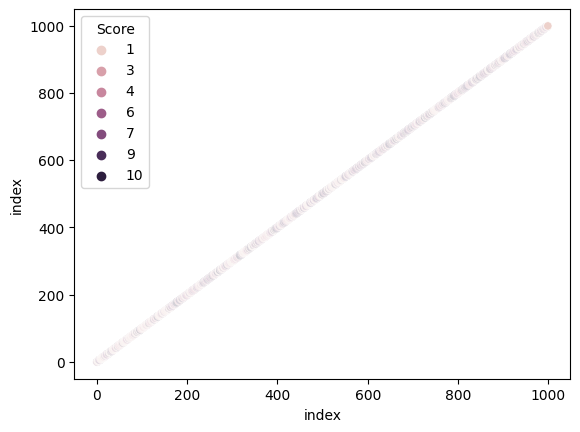

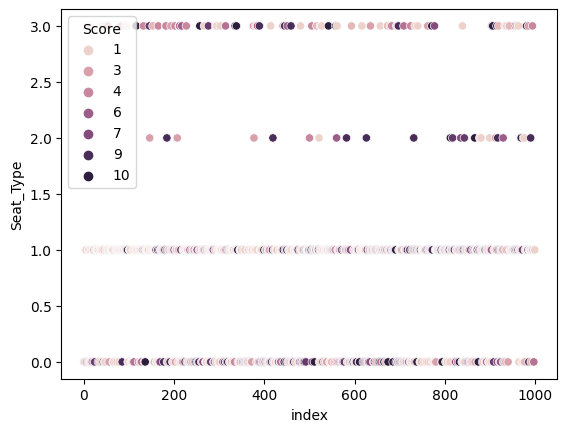

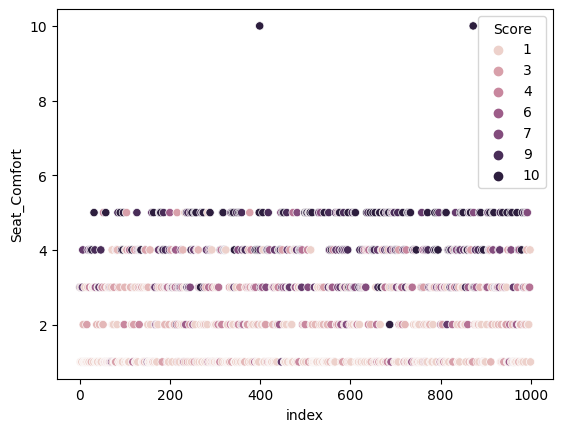

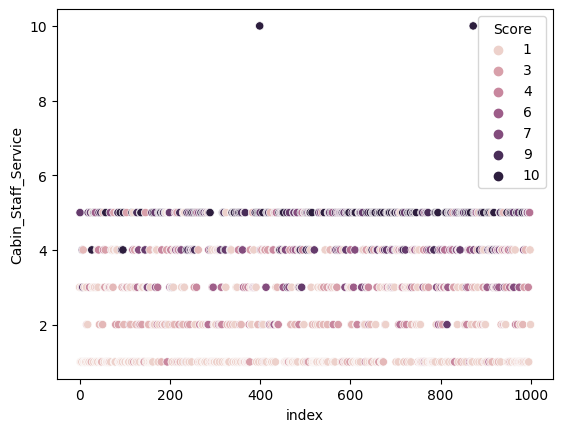

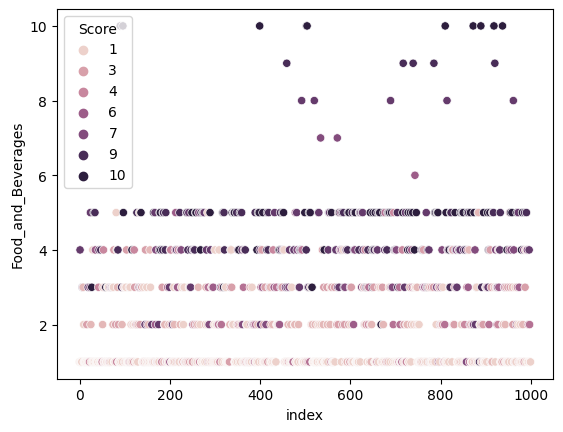

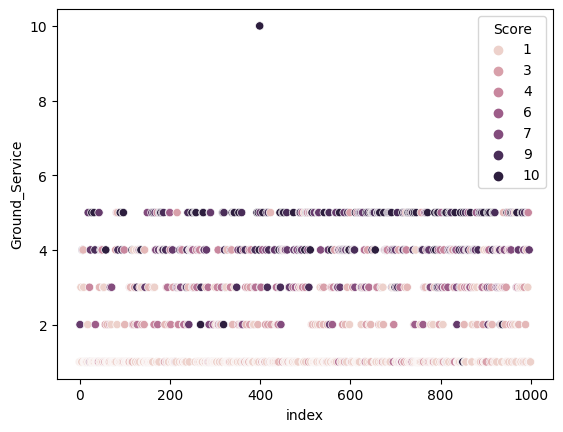

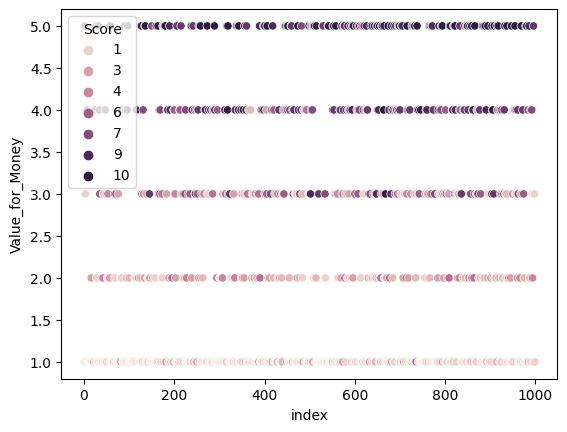

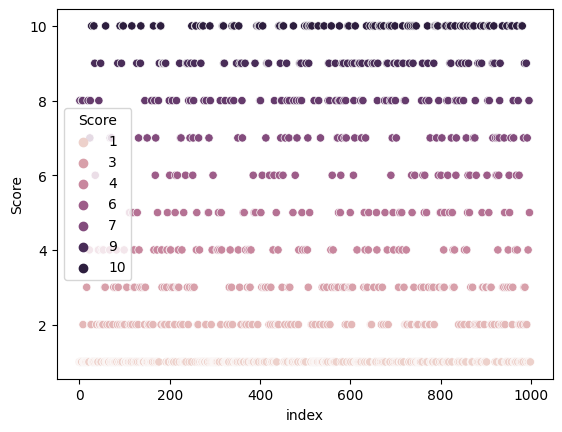

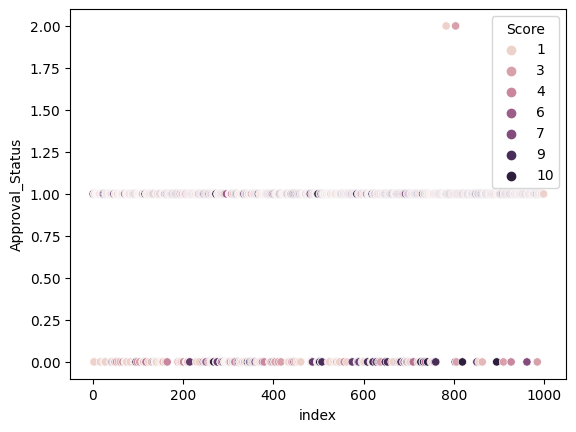

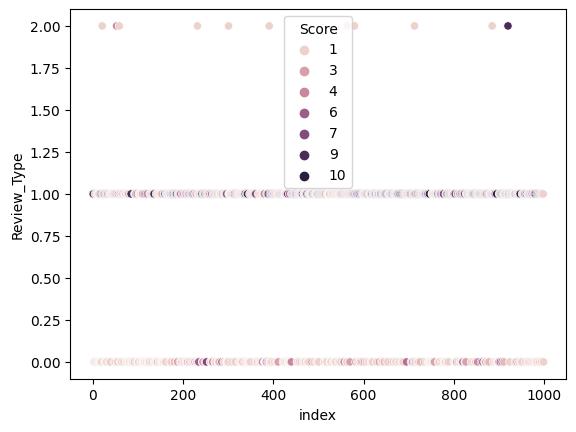

In [21]:
df.reset_index(inplace=True)
for column in df.columns:
    sbn.scatterplot(data=df, x="index", y=column, hue="Score")
    plt.show()

In [22]:
df = df[df['Seat_Comfort'] <= 5]

In [23]:
df = df[df['Food_and_Beverages'] <= 5]

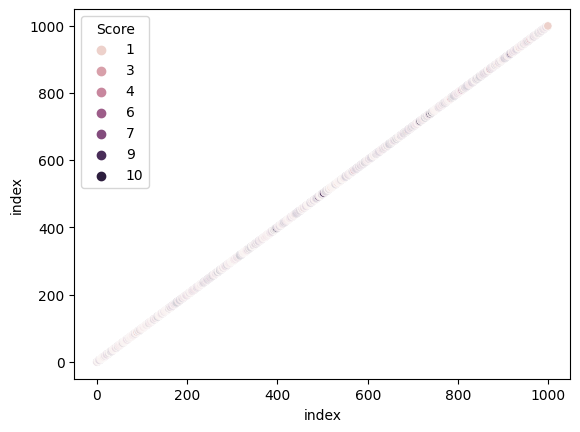

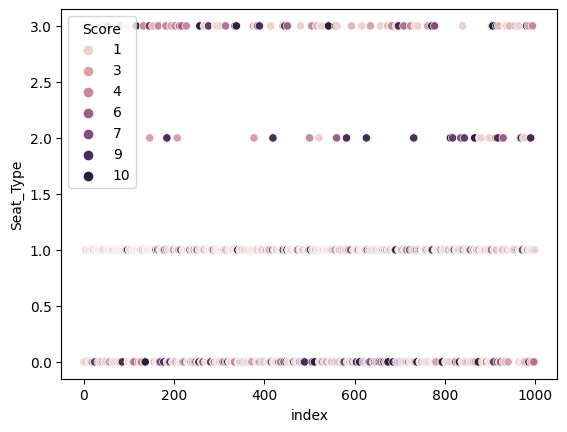

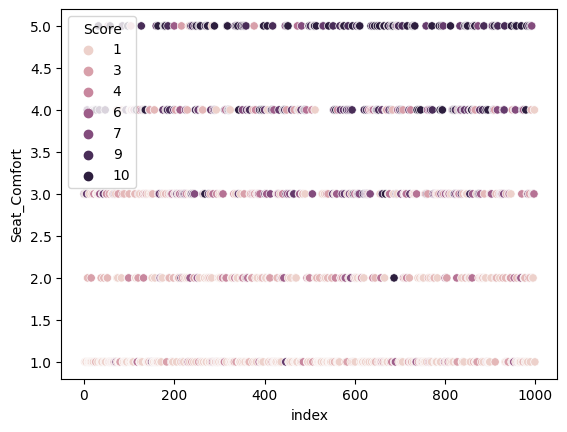

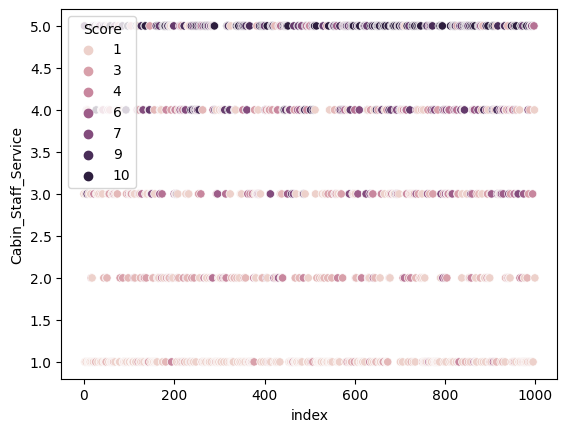

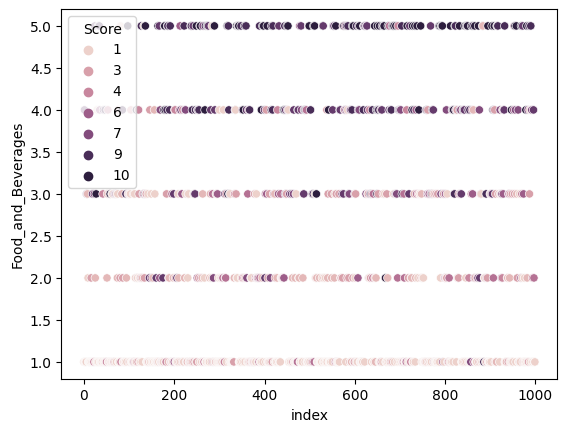

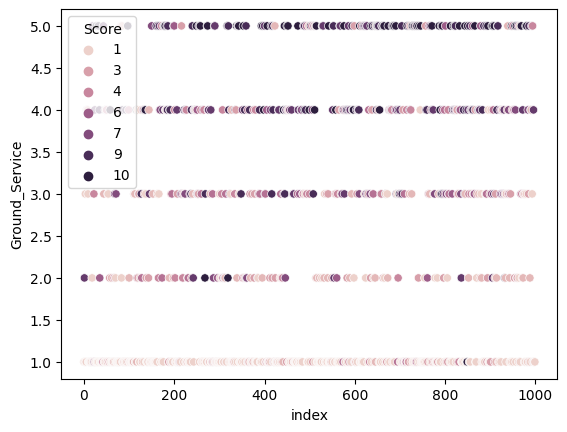

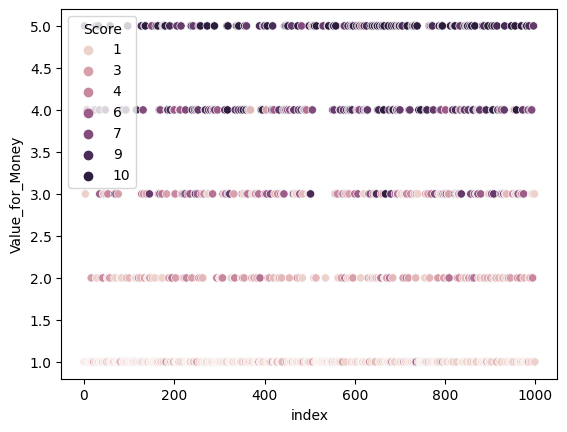

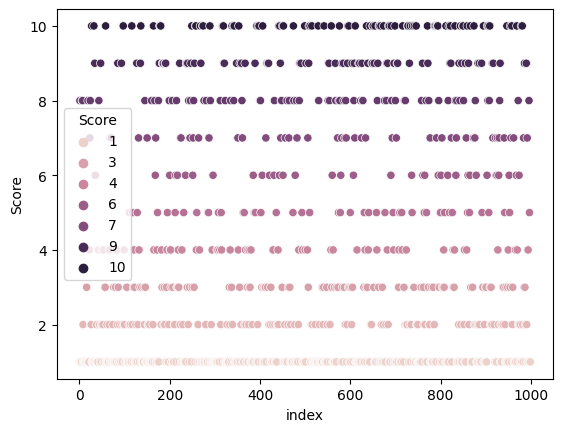

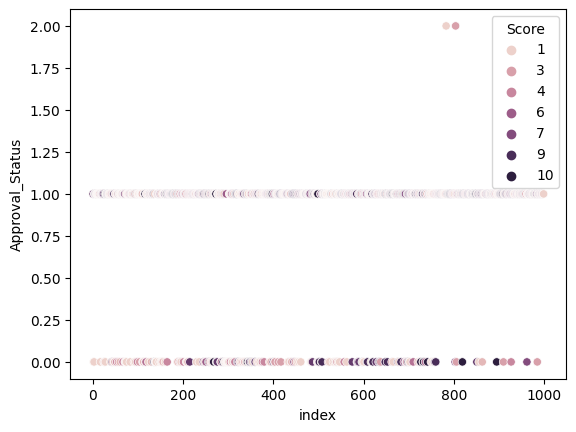

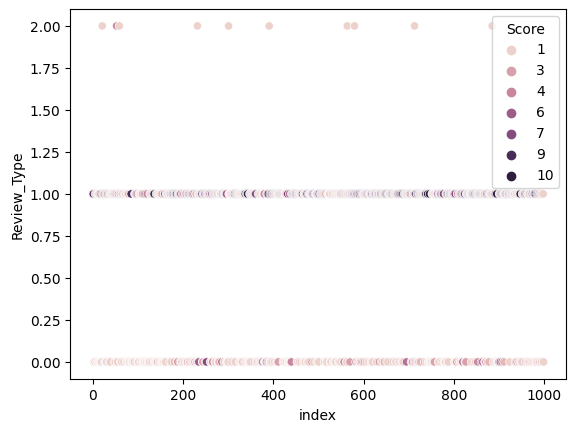

In [24]:
for column in df.columns:
    sbn.scatterplot(data=df, x="index", y=column, hue="Score")
    plt.show()

## Final Data Checks

In [25]:
df.isna().sum()

index                  0
Seat_Type              0
Seat_Comfort           0
Cabin_Staff_Service    0
Food_and_Beverages     0
Ground_Service         0
Value_for_Money        0
Score                  0
Approval_Status        0
Review_Type            0
dtype: int64

In [26]:
df.dropna(subset=['Approval_Status'], inplace=True)

In [27]:
df.drop("index", axis=1, inplace=True)

In [28]:
df.dtypes

Seat_Type                int32
Seat_Comfort           float64
Cabin_Staff_Service    float64
Food_and_Beverages     float64
Ground_Service         float64
Value_for_Money          int64
Score                    int64
Approval_Status          int32
Review_Type              int32
dtype: object

# TensorFlow

## Train-Test Split

In [29]:
x = df.drop("Score",axis=1).values
y = df["Score"].values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Creating The Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
x_train.shape

(683, 8)

In [36]:
model = Sequential()

model.add(Dense(8,activation="relu")) #The model consists of 6 layers.
model.add(Dense(16,activation="relu")) #ReLU activation model selected  
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1)) #Output layer

model.compile(optimizer="adam",loss="mse") 

In [37]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=250, epochs=180)

Epoch 1/180
3/3 [==============================] - 1s 97ms/step - loss: 26.4804 - val_loss: 28.9841
Epoch 2/180
3/3 [==============================] - 0s 20ms/step - loss: 26.3472 - val_loss: 28.8236
Epoch 3/180
3/3 [==============================] - 0s 18ms/step - loss: 26.1943 - val_loss: 28.6565
Epoch 4/180
3/3 [==============================] - 0s 20ms/step - loss: 26.0430 - val_loss: 28.4815
Epoch 5/180
3/3 [==============================] - 0s 20ms/step - loss: 25.8744 - val_loss: 28.2595
Epoch 6/180
3/3 [==============================] - 0s 31ms/step - loss: 25.6437 - val_loss: 27.9167
Epoch 7/180
3/3 [==============================] - 0s 28ms/step - loss: 25.2967 - val_loss: 27.4082
Epoch 8/180
3/3 [==============================] - 0s 16ms/step - loss: 24.7983 - val_loss: 26.7417
Epoch 9/180
3/3 [==============================] - 0s 18ms/step - loss: 24.1517 - val_loss: 25.9241
Epoch 10/180
3/3 [==============================] - 0s 16ms/step - loss: 23.3950 - val_loss: 24.9744

In [38]:
loss_data = pd.DataFrame(model.history.history)

In [39]:
loss_data.head()

,loss,val_loss
0,26.480371,28.984129
1,26.347153,28.823605
2,26.194334,28.656492
3,26.043020,28.481522
4,25.874353,28.259514


<Axes: >

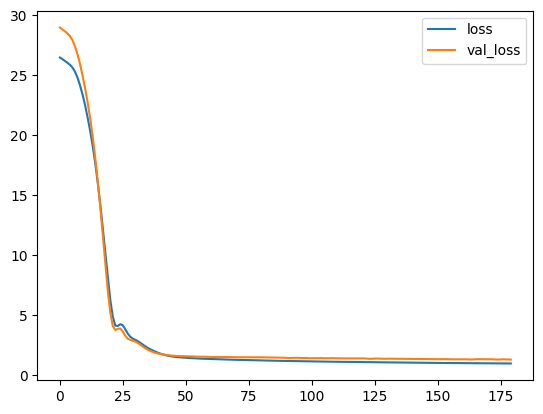

In [40]:
loss_data.plot() #Missing data and test result data are compared.

## Prediction

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
predictSerie = model.predict(x_test) #A new prediction is made by giving the test.

10/10 [==============================] - 0s 889us/step


In [43]:
predictSerie

array([[ 1.0553324 ],
       [ 1.5947196 ],
       [ 2.348289  ],
       [ 6.674661  ],
       [ 5.128877  ],
       [ 9.457858  ],
       [ 8.073938  ],
       [ 2.1315491 ],
       [ 4.8751407 ],
       [ 1.069979  ],
       [ 2.2382748 ],
       [ 1.6805165 ],
       [ 1.069979  ],
       [ 8.586607  ],
       [ 4.786488  ],
       [ 3.1411712 ],
       [ 7.8199077 ],
       [ 1.4017566 ],
       [10.148644  ],
       [ 2.9903443 ],
       [ 3.8801286 ],
       [ 2.9804952 ],
       [ 1.3828964 ],
       [ 6.2278743 ],
       [ 1.407522  ],
       [ 7.234826  ],
       [ 3.1240118 ],
       [ 1.4005364 ],
       [ 3.8753006 ],
       [ 2.8039248 ],
       [ 1.8187733 ],
       [ 2.7948315 ],
       [ 2.042444  ],
       [ 9.484747  ],
       [ 7.477938  ],
       [ 4.3653164 ],
       [ 1.407522  ],
       [ 8.697613  ],
       [ 9.345208  ],
       [ 7.0831456 ],
       [ 6.720633  ],
       [ 4.185256  ],
       [ 1.0433626 ],
       [ 3.2332106 ],
       [ 5.06335   ],
       [ 5

In [44]:
mean_absolute_error(y_test, predictSerie)

0.7968435735524106

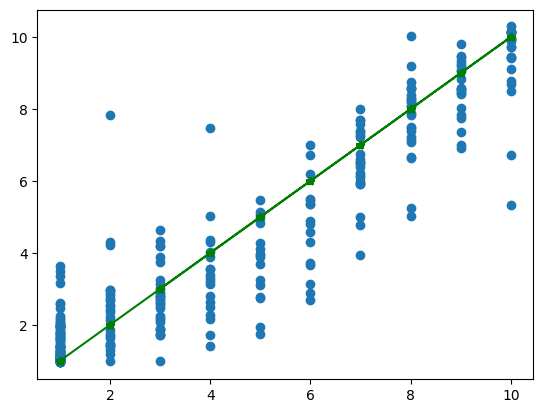

In [45]:
plt.scatter(y_test,predictSerie)
plt.plot(y_test,y_test,"g-*") #Looking at how much the graph deviates from what it should be.

In [46]:
df.iloc[256]

Seat_Type               1.0
Seat_Comfort            5.0
Cabin_Staff_Service     5.0
Food_and_Beverages      5.0
Ground_Service          5.0
Value_for_Money         5.0
Score                  10.0
Approval_Status         1.0
Review_Type             1.0
Name: 258, dtype: float64

In [47]:
newScore = df.drop("Score", axis=1).iloc[256] 

In [48]:
newScore = scaler.transform(newScore.values.reshape(-1,8))

In [49]:
model.predict(newScore)

1/1 [==============================] - 0s 24ms/step


array([[10.148646]], dtype=float32)

In [50]:
df.iloc[765]

Seat_Type              1.0
Seat_Comfort           1.0
Cabin_Staff_Service    1.0
Food_and_Beverages     1.0
Ground_Service         1.0
Value_for_Money        1.0
Score                  1.0
Approval_Status        1.0
Review_Type            0.0
Name: 779, dtype: float64

In [51]:
newScore = df.drop("Score", axis=1).iloc[765] 

In [52]:
newScore = scaler.transform(newScore.values.reshape(-1,8))

In [53]:
model.predict(newScore)

1/1 [==============================] - 0s 31ms/step


array([[1.069979]], dtype=float32)